# 📈 Prediction Results(load dataset)

In [2]:
import pandas as pd

# Load the dataset with predicted conflict values
df = pd.read_csv("conflict_predictions.csv")

# Preview it
df.head()


,scientificName,eventDate,decimalLatitude,decimalLongitude,county,stateProvince,individualCount,basisOfRecord,occurrenceStatus,scientificName_lower,month,species_code,predicted_conflict
0,"Potamochoerus larvatus (F.Cuvier, 1822)",2009-10-20,-4.394107,39.545162,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"potamochoerus larvatus (f.cuvier, 1822)",10,4,0
1,"Potamochoerus larvatus (F.Cuvier, 1822)",2009-10-17,-3.844000,39.669200,Kilifi,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"potamochoerus larvatus (f.cuvier, 1822)",10,4,0
2,"Papio cynocephalus (Linnaeus, 1766)",2009-10-17,-3.844000,39.669200,Kilifi,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"papio cynocephalus (linnaeus, 1766)",10,3,0
3,"Civettictis civetta (Schreber, 1776)",2009-10-17,-3.844000,39.669200,Kilifi,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"civettictis civetta (schreber, 1776)",10,0,1
4,"Syncerus caffer (Sparrman, 1779)",2016-09-29,-4.407870,39.477510,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"syncerus caffer (sparrman, 1779)",9,5,1


## Species responsible for preidicted conflict

In [3]:
df[df['predicted_conflict'] == 1]['scientificName'].value_counts()


,count
scientificName,
"Syncerus caffer (Sparrman, 1779)",2
"Civettictis civetta (Schreber, 1776)",1
"Papio cynocephalus (Linnaeus, 1766)",1
"Panthera pardus (Linnaeus, 1758)",1
"Loxodonta africana (Blumenbach, 1797)",1


## Seasonal conflict Trends

<Axes: title={'center': 'Predicted Conflict by Month'}, xlabel='month', ylabel='Number of Conflicts'>

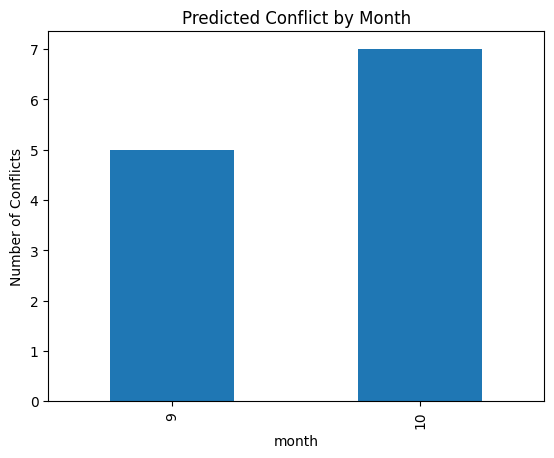

In [4]:
# Check which months have highest predicted conflict
df['month'].value_counts().sort_index().plot(kind='bar', title='Predicted Conflict by Month', ylabel='Number of Conflicts')


## Map predictions for hotspot areas

In [5]:
import folium
from folium.plugins import MarkerCluster

# Create map
m = folium.Map(location=[-3.3, 38.5], zoom_start=7)
marker_cluster = MarkerCluster().add_to(m)

# Plot predicted conflict points only
for idx, row in df[df['predicted_conflict'] == 1].iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=row['scientificName']
    ).add_to(marker_cluster)

m


## saving final report

In [7]:
df[df['predicted_conflict'] == 1].to_csv("predicted_conflict_hotspots.csv", index=False)
df


,scientificName,eventDate,decimalLatitude,decimalLongitude,county,stateProvince,individualCount,basisOfRecord,occurrenceStatus,scientificName_lower,month,species_code,predicted_conflict
0,"Potamochoerus larvatus (F.Cuvier, 1822)",2009-10-20,-4.394107,39.545162,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"potamochoerus larvatus (f.cuvier, 1822)",10,4,0
1,"Potamochoerus larvatus (F.Cuvier, 1822)",2009-10-17,-3.844000,39.669200,Kilifi,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"potamochoerus larvatus (f.cuvier, 1822)",10,4,0
2,"Papio cynocephalus (Linnaeus, 1766)",2009-10-17,-3.844000,39.669200,Kilifi,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"papio cynocephalus (linnaeus, 1766)",10,3,0
3,"Civettictis civetta (Schreber, 1776)",2009-10-17,-3.844000,39.669200,Kilifi,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"civettictis civetta (schreber, 1776)",10,0,1
4,"Syncerus caffer (Sparrman, 1779)",2016-09-29,-4.407870,39.477510,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"syncerus caffer (sparrman, 1779)",9,5,1
5,"Papio cynocephalus (Linnaeus, 1766)",2009-10-20,-4.394107,39.545162,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"papio cynocephalus (linnaeus, 1766)",10,3,0
6,"Papio cynocephalus (Linnaeus, 1766)",2016-09-19,-4.235328,39.415407,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"papio cynocephalus (linnaeus, 1766)",9,3,1
7,"Panthera pardus (Linnaeus, 1758)",2016-09-19,-4.235328,39.415407,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"panthera pardus (linnaeus, 1758)",9,2,1
8,"Syncerus caffer (Sparrman, 1779)",2016-09-19,-4.235328,39.415407,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"syncerus caffer (sparrman, 1779)",9,5,1
9,"Loxodonta africana (Blumenbach, 1797)",2016-09-19,-4.235328,39.415407,Kwale,Kenyan Coast,1,HUMAN_OBSERVATION,PRESENT,"loxodonta africana (blumenbach, 1797)",9,1,1
